(701, 3)


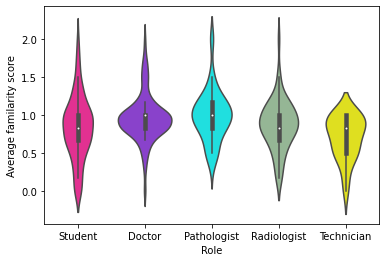

In [39]:
import pandas as pd
import seaborn as sb
from matplotlib import pyplot as plt
import plotly.graph_objects as go


#my_df = sb.load_dataset('tips')
#my_df.head()


excel_file="violin plot familarity for professions.xlsx"
#df=pd.read_excel(excel_file, sheet_name='Students', index_col=0)

df=pd.read_excel(excel_file, sheet_name='data', usecols = ['Role','Average familarity score', 'Urban-rural']) 


#print(dataframe)

print(df.shape)

df.head()


# creating a dictionary with one specific color per group:
my_pal = {"Student": "deeppink", "Doctor": "blueviolet", "Pathologist": "cyan", "Radiologist": "darkseagreen", "Technician": "yellow"}

#seaborn.violinplot(x, y,data,…) 
sb.violinplot(x = "Role", y = "Average familarity score", data=df, palette=my_pal, order=["Student", "Doctor", "Pathologist", "Radiologist", "Technician"])
plt.show()




#violin plot using pyplot

#import plotly.graph_objects as go

#import pandas as pd

#df = pd.read_csv("https://raw.githubusercontent.com/plotly/datasets/master/violin_data.csv")

fig = go.Figure()

roles = ['Student', 'Doctor', 'Pathologist', 'Radiologist', 'Technician']


count=0

for role in roles:
    
    count=count+1
    if count==1:
        colors='hotpink'
    elif count==2:
        colors='mediumorchid'
    elif count==3:
        colors='cyan'
    elif count==4:
        colors='darkseagreen'
    else:
        colors='gold'
        
        

    fig.add_trace(go.Violin(x=df['Role'][df['Role'] == role],
                            y=df['Average familarity score'][df['Role'] == role],
                            name=role,fillcolor=colors,line_color='dimgray',box_visible=True,
                            meanline_visible=True))
    
    #resize the figure
    fig.update_layout(autosize=False, width=800, height=500)

fig.show()






###Grouped violin plot (Outside city vs Inside city familarity score)

fig = go.Figure()

fig.add_trace(go.Violin(x=df['Role'][ df['Urban-rural'] == 'Inside City' ],
                        y=df['Average familarity score'][ df['Urban-rural'] == 'Inside City' ],
                        legendgroup='Inside City', scalegroup='Inside City', name='Inside City',
                        line_color='grey',box_visible=True,meanline_visible=True, fillcolor='gold'))


fig.add_trace(go.Violin(x=df['Role'][ df['Urban-rural'] == 'Outside City' ],
                        y=df['Average familarity score'][ df['Urban-rural'] == 'Outside City' ],
                        legendgroup='Outside City', scalegroup='Outside City', name='Outside City',
                        line_color='grey',box_visible=True,meanline_visible=True, fillcolor='darkseagreen'))

fig.update_traces(box_visible=True, meanline_visible=True)
fig.update_layout(violinmode='group',autosize=False, width=800,height=500)

fig.show()
